# **Import Library**

In [ ]:
import joblib, numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle, resample
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# **Reviewing Data**

In [ ]:
data = pd.read_csv("water_potability.csv")

data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


*There are 9 Independent features and 1 dependent feature. Details for each feature are provided above.*

*The goal is to use the Potability feature as the target feature for classification problems.*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


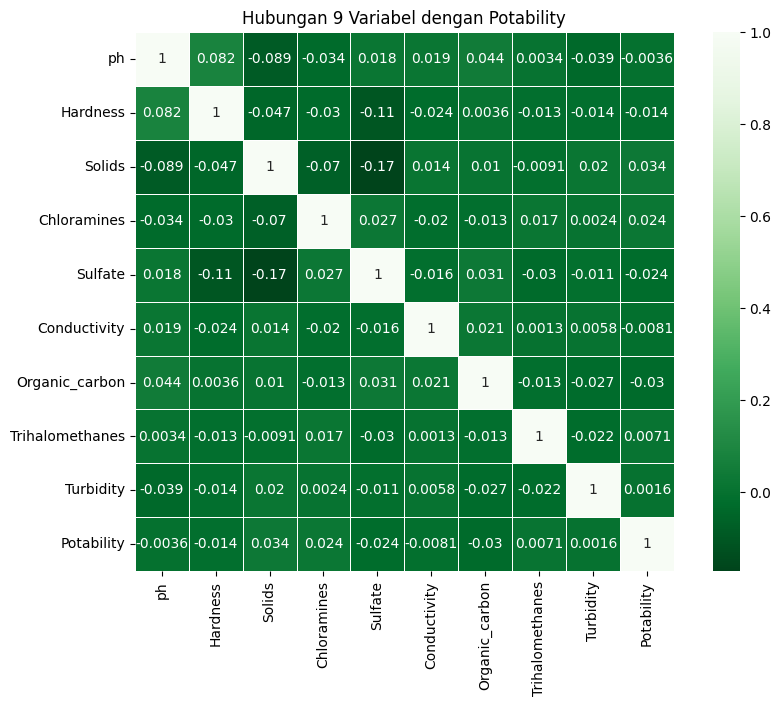

In [ ]:
correlation = data.corr()

fig = plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, square=True, linewidths=.5, cmap=plt.cm.Greens_r)
plt.title('Hubungan 9 Variabel dengan Potability')

plt.show()

In [ ]:
data.describe().style.background_gradient(cmap='Greens')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# **Data Validation**

In [ ]:
data.shape

(3276, 10)

In [ ]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

*It can be seen that the dataset contains some empty values which will need to be handled later.*

In [ ]:
def count_outliers(data):
    columns = ['ph','Hardness','Solids','Chloramines','Sulfate',
               'Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
    outlier_counts = {}

    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

        print(f"Kolom: {column}")
        print(f"  Lower Bound: {lower_bound}")
        print(f"  Upper Bound: {upper_bound}", "\n")

    return outlier_counts

outlier_counts = count_outliers(data)
print(f'Jumlah Data Outliers adalah:', outlier_counts)

Kolom: ph
  Lower Bound: 3.1396306008319446
  Upper Bound: 11.015527436538386 

Kolom: Hardness
  Lower Bound: 117.12516037150485
  Upper Bound: 276.3928337208903 

Kolom: Solids
  Lower Bound: -1832.4174487462951
  Upper Bound: 44831.86987314956 

Kolom: Chloramines
  Lower Bound: 3.1462213405647073
  Upper Bound: 11.09608644703562 

Kolom: Sulfate
  Lower Bound: 229.32348900968265
  Upper Bound: 438.3261792097813 

Kolom: Conductivity
  Lower Bound: 191.64757856456453
  Upper Bound: 655.8791400416264 

Kolom: Organic_carbon
  Lower Bound: 5.328026018267515
  Upper Bound: 23.295426859188986 

Kolom: Trihalomethanes
  Lower Bound: 23.60512968935396
  Upper Bound: 109.57687884035661 

Kolom: Turbidity
  Lower Bound: 1.8487974931046152
  Upper Bound: 6.091233163793407 

Jumlah Data Outliers adalah: {'ph': 46, 'Hardness': 83, 'Solids': 47, 'Chloramines': 61, 'Sulfate': 41, 'Conductivity': 11, 'Organic_carbon': 25, 'Trihalomethanes': 33, 'Turbidity': 19}


*It can be seen that the data contains outliers.*

# **Cleaning Data**
*Because water quality is sensitive data, neither empty data nor outliers data can be manipulated by entering mean, median, mode or others.*

*Here will remove rows that contain empty data because the information is incomplete*

In [ ]:
data = data.dropna()

data.shape

(2011, 10)

# **Constructing Data**

In [ ]:
data.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

*Shows whether the water is suitable for human consumption, where 1 means drinkable and 0 means undrinkable.*

*This is an unbalanced dataset because 0 is more than 1. Here it is necessary to balance the data so that there is no bias.*

In [ ]:
nol = data[data['Potability']==0]
satu = data[data['Potability']==1]

data_upsampled = resample(satu, replace=True, n_samples=1200)
data = pd.concat([nol, data_upsampled])

data = shuffle(data)

In [ ]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
408,6.443754,196.615992,25740.412591,2.484380,435.672765,352.353623,16.924419,33.051888,4.498685,1
1223,7.582942,185.045993,23072.780698,5.892273,297.505772,518.048524,12.038457,80.312558,4.164029,1
675,8.977822,198.996287,20225.642923,7.569518,352.685843,492.097825,19.621923,64.177232,3.200000,1
2022,6.433722,177.252511,20321.229404,6.378918,373.051772,375.028222,11.684648,61.629823,3.641490,1
795,10.268415,225.074218,14694.420625,6.722843,300.763772,353.630913,13.553796,64.012944,5.199865,1
...,...,...,...,...,...,...,...,...,...,...
2925,11.563169,174.942862,19359.428816,6.495619,332.446490,366.312672,17.529526,38.431200,5.107236,0
2513,9.831402,263.632722,13345.369098,6.566929,295.774218,462.439737,12.002323,76.021367,3.311808,0
2929,7.528980,225.340986,8129.734919,6.305472,309.231247,379.339293,16.961944,64.265787,3.644410,0
852,6.753128,191.982995,18222.931957,3.920974,296.196618,389.742462,9.689144,92.219615,5.102517,0


In [ ]:
data.Potability.value_counts()

1    1200
0    1200
Name: Potability, dtype: int64

# **Spliting Data**

In [ ]:
X = data.drop('Potability', axis=1)
y = data['Potability']

X.shape, y.shape

((2400, 9), (2400,))

In [ ]:
sc = StandardScaler()

features = X.columns

X[features] = sc.fit_transform(X[features])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("X train  :",X_train.shape)
print("X test   :",X_test.shape)
print("y train  :",y_train.shape)
print("y test   :",y_test.shape)

X train  : (1920, 9)
X test   : (480, 9)
y train  : (1920,)
y test   : (480,)


# **Random Forest**

### **Finding the Best Hyperparameters for a Model**

In [ ]:
model_rf = RandomForestClassifier()

params_rf = {
    'n_estimators':[100, 200, 350, 500], # number of trees in Random Forest
    'min_samples_leaf':[2, 10, 30] # minimum number of samples required at leaf nodes
    }

grid_rf = GridSearchCV(model_rf, param_grid=params_rf, cv=5)

grid_rf.fit(X_train, y_train)

print("Parameter terbaik untuk Random Forest :", grid_rf.best_params_)

Parameter terbaik untuk Random Forest : {'min_samples_leaf': 2, 'n_estimators': 500}


In [ ]:
model_rf = RandomForestClassifier(min_samples_leaf=2, n_estimators=500)

model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=500)

In [ ]:
y_pred = model_rf.predict(X_test)

In [ ]:
joblib.dump(model_rf, 'model.pkl')

# **Evaluation**

### **Feature Importance**
*Measure of the relative significance of each feature to the predicted outcome.*

In [ ]:
feature_importance = model_rf.feature_importances_

feature_names = X_train.columns

sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

for feature_name, importance in zip(sorted_feature_names, sorted_feature_importance):
    print(f"Fitur {feature_name}: {importance}")

Fitur ph: 0.15068290755965044
Fitur Sulfate: 0.1438153090942961
Fitur Chloramines: 0.11920158562016096
Fitur Solids: 0.11252601412378171
Fitur Hardness: 0.10900198046200013
Fitur Conductivity: 0.0940217970442038
Fitur Organic_carbon: 0.09311595776857183
Fitur Trihalomethanes: 0.09171872864728624
Fitur Turbidity: 0.0859157196800488


Text(0.5, 1.0, 'Feature Importance Score')

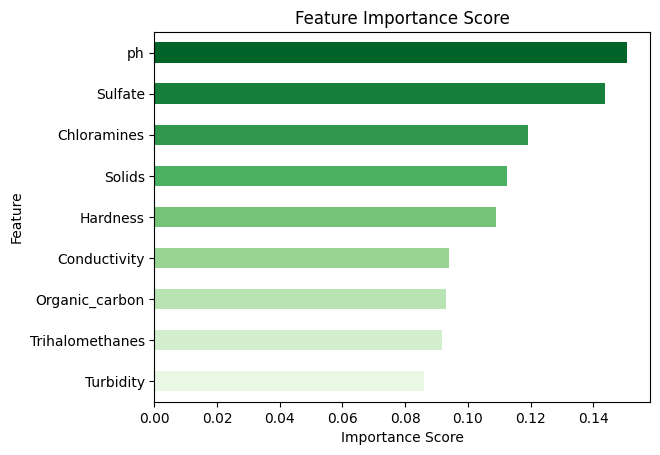

In [ ]:
feat_imp = pd.Series(feature_importance, index=feature_names).sort_values()

feat_imp.plot(color=sns.color_palette('Greens', len(feat_imp)), kind='barh')

plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance Score")

### **Receiver Operating Characteristic (ROC)**

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

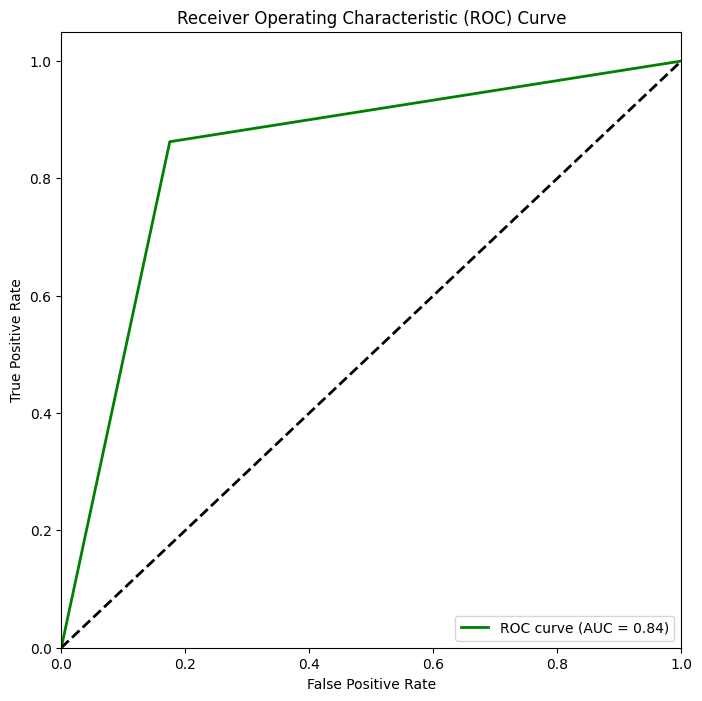

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()

*The curve that is closer to the upper left corner means the classification model is getting better. This model uses the Random Forest method and has an accuracy of 84%, which shows the suitability of the prediction with the test data. With this evaluation, it can be seen in more detail how the model distinguishes good and bad water quality based on the existing features.*

### **Confussion Matrix**

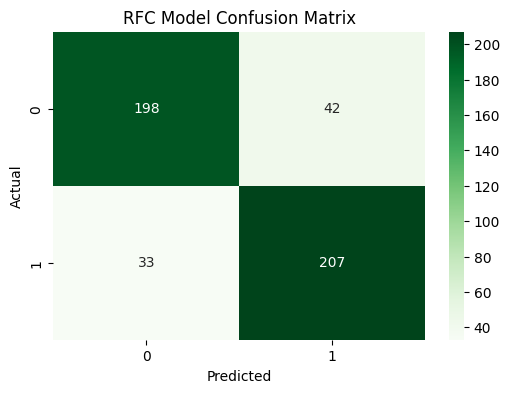

In [ ]:
cmd = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))

sns.heatmap(cmd, annot=True, fmt ='d', cmap='Greens')
plt.title('RFC Model Confusion Matrix')

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

*The main diagonal shows the number of predicted data that matches reality for the “Potable” and “Not Potable” categories, namely 207 and 198. However, there are data that are predicted incorrectly for the “Potable” and “Not Potable” categories, namely 42 and 33.*

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       240
           1       0.83      0.86      0.85       240

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480



*For the “Potable” class, this model has a precision of 83% and a recall of 86%, which means that this model is quite accurate and sensitive in recognizing drinkable water. For the “Not Potable” class, this model has a precision of 86% and a recall of 82%, which means that this model is quite accurate and specific in recognizing drinkable water. The F1 Score value, which is the harmonic mean of precision and recall, shows an overall value of 0.85 for the “Potable” class and 0.84 for the “Not Potable” class.*